Importing libraries and setting up aliases

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Reading a CSV file

In [2]:
df=pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Describing the columns in a dataset

Column Information:

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Providing summary of the dataset including data types, non-null counts, and memory usage

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Printing unique values for each column in a dataset

In [4]:
print("\n\nUnique Values:\n")
[f"{col}: {df[col].unique()}" for col in df.columns]



Unique Values:



["class: ['p' 'e']",
 "cap-shape: ['x' 'b' 's' 'f' 'k' 'c']",
 "cap-surface: ['s' 'y' 'f' 'g']",
 "cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']",
 "bruises: ['t' 'f']",
 "odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']",
 "gill-attachment: ['f' 'a']",
 "gill-spacing: ['c' 'w']",
 "gill-size: ['n' 'b']",
 "gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']",
 "stalk-shape: ['e' 't']",
 "stalk-root: ['e' 'c' 'b' 'r' '?']",
 "stalk-surface-above-ring: ['s' 'f' 'k' 'y']",
 "stalk-surface-below-ring: ['s' 'f' 'y' 'k']",
 "stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']",
 "stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']",
 "veil-type: ['p']",
 "veil-color: ['w' 'n' 'o' 'y']",
 "ring-number: ['o' 't' 'n']",
 "ring-type: ['p' 'e' 'l' 'f' 'n']",
 "spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']",
 "population: ['s' 'n' 'a' 'v' 'y' 'c']",
 "habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']"]

In [5]:
df.drop(['veil-type'],axis=1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


Printing the total number of duplicate rows in the dataset

In [6]:
print(f'\n\nTotal duplicate rows: {df.duplicated().sum()}')
df= df.drop_duplicates()



Total duplicate rows: 0


Identifying and replacing missing values denoted by '?' in the categorical columns of a dataset with np.NaN and visualizing the presence of missing values using a heatmap

<Axes: >

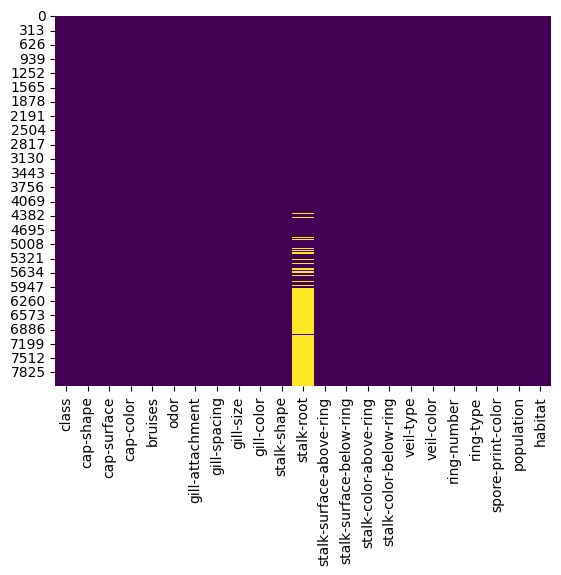

In [7]:
cat_col=[]
for column in df.columns:
    if df[column].dtype == 'object':
        cat_col.append(column)
        df[column].replace('?', np.NaN, inplace=True)
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

Inference:
Only the column 'stalk-root' has missing values

Visualizing the distribution of each selected column in a dataset and plotting the count plot

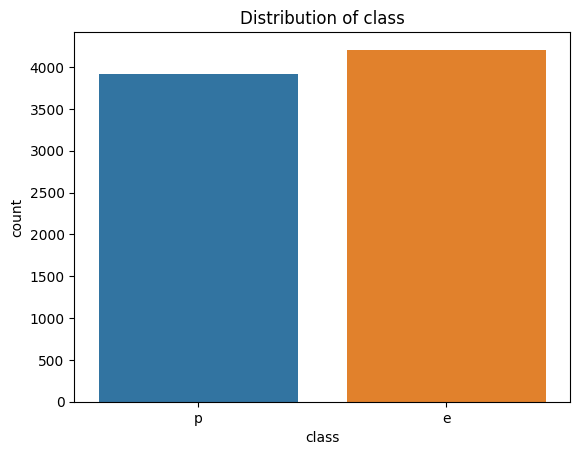

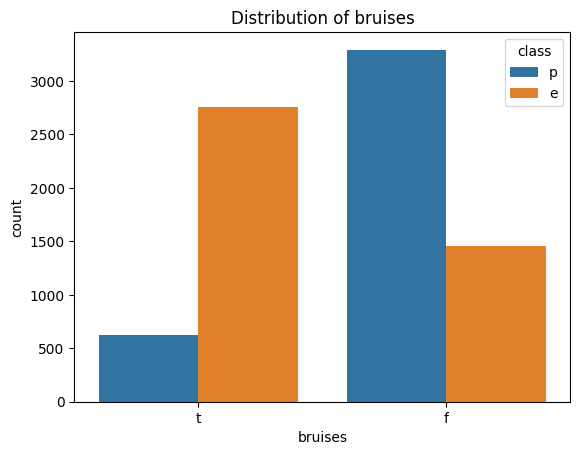

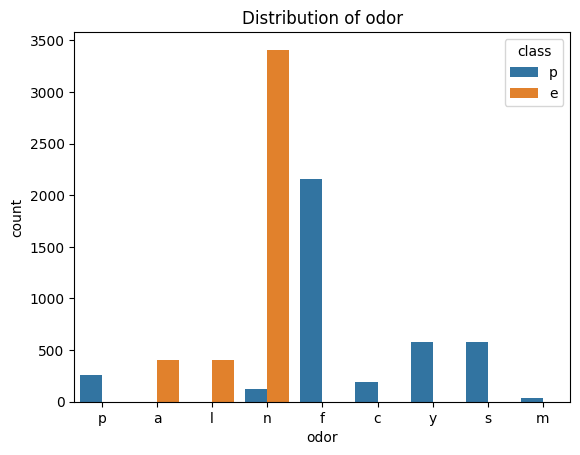

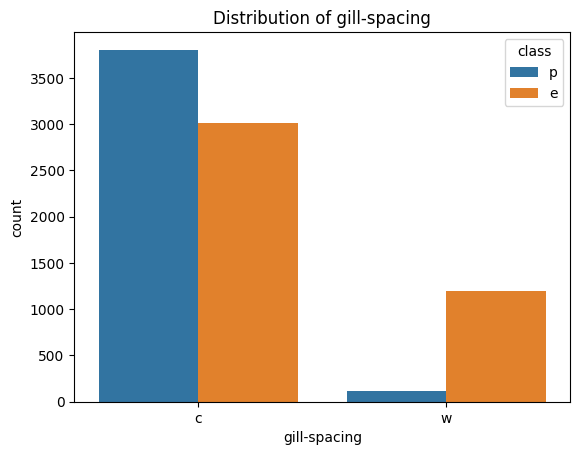

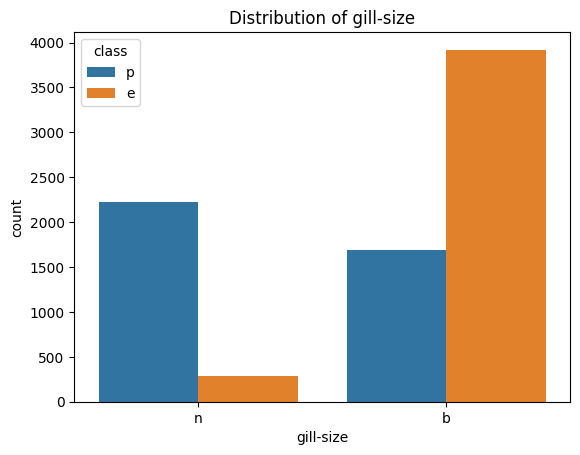

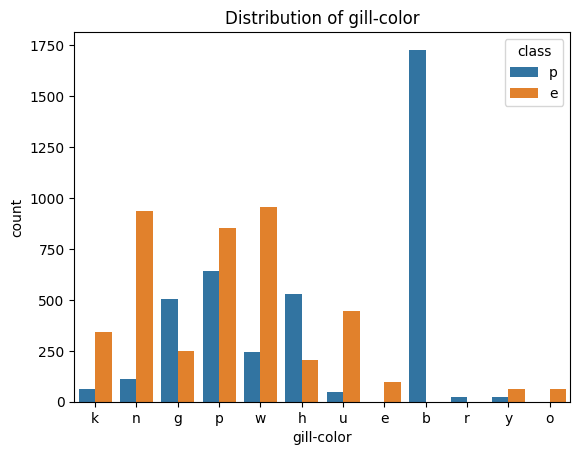

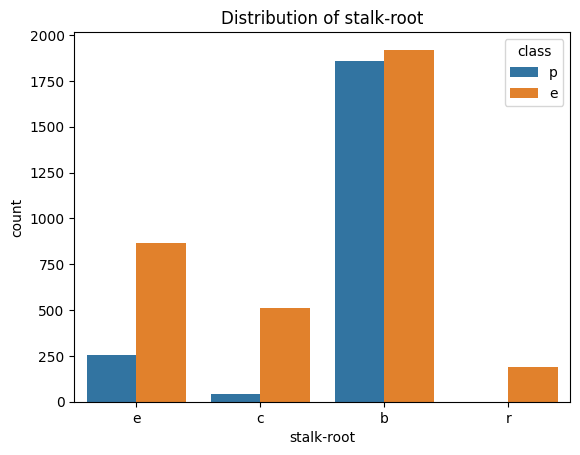

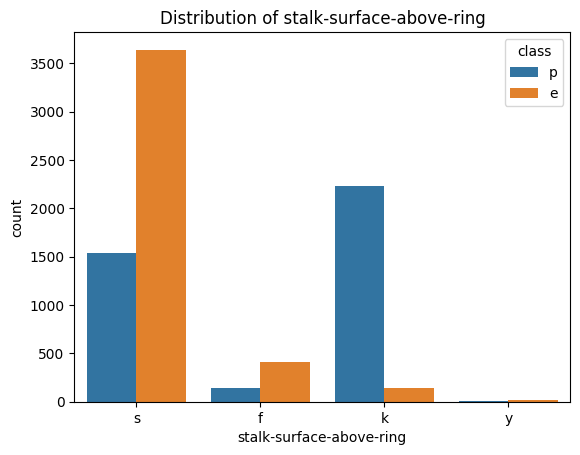

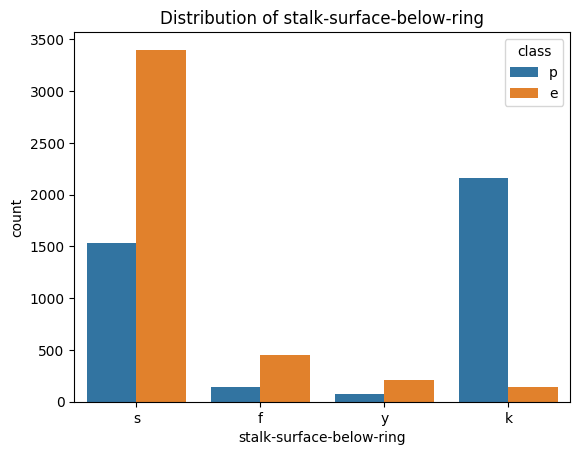

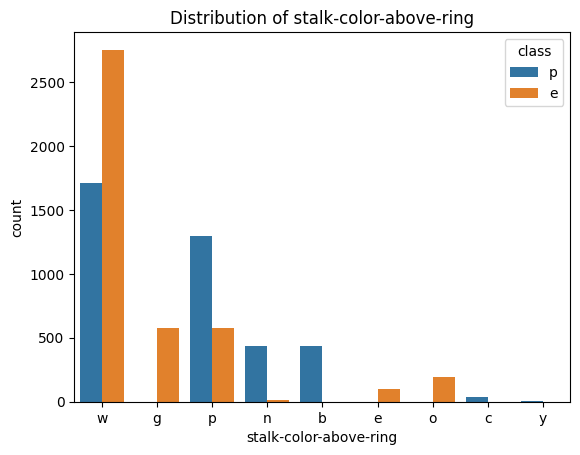

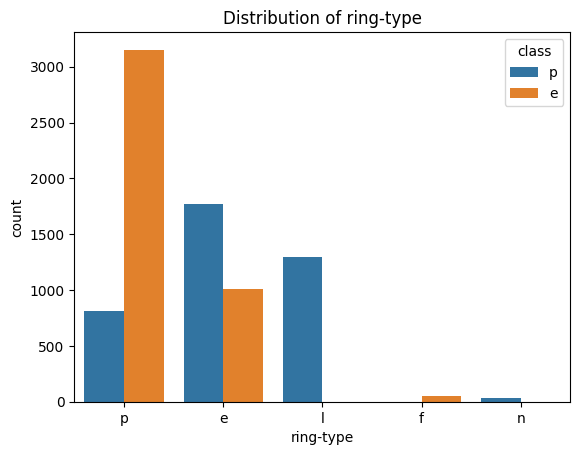

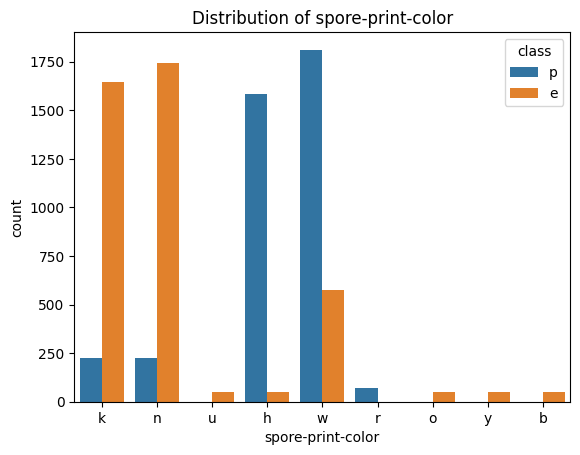

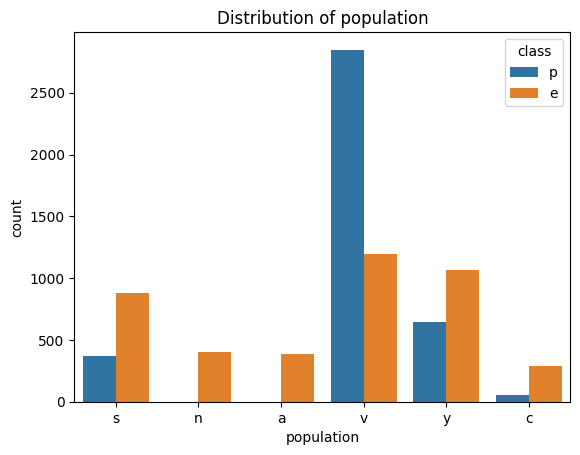

In [8]:
df_dropna=df.dropna()
selected_df=df_dropna.drop(['cap-shape','cap-color','veil-type','stalk-shape','gill-attachment'
,'cap-surface','stalk-color-below-ring','veil-color','habitat','ring-number'], axis=1)
for col in selected_df.columns:
    sns.countplot(x=col,hue='class', data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

Inference:

From this countplot,we can infer that,

1.The class columns is balanced

2.Most of the edible mushrooms does not have any odor or have almond and anise odor

3.Most of the gill spacing is closed


Mapping categorical variables to numerical values,dropping rows with missing values,filling missing values with the mode of each column, and imputing missing values using a RandomForestClassifier model for the specified column

In [9]:
cols=cat_col
mm = MinMaxScaler()
mappin = dict()
for variable in cols:
    mappings = {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}
    mappin[variable] = mappings

for variable in cols:
    df[variable] = df[variable].map(mappin[variable])
# print(df.isnull().sum())
df_dropna=df.dropna()

df_mode=df.fillna(df.mode().iloc[0])

columns_with_missing_values = ['stalk-root']

X_train = df.drop(columns=columns_with_missing_values)
y_train = df[columns_with_missing_values]

# Identify rows with missing values
missing_rows = df[y_train.isnull().any(axis=1)].index

# Create a mask to identify rows without missing values
non_missing_rows = df[~df.index.isin(missing_rows)]

# Split the data into training and test sets
X = non_missing_rows.drop(columns=columns_with_missing_values)
y = non_missing_rows[columns_with_missing_values]


# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict missing values in the test set
X_test=df[df.index.isin(missing_rows)].drop(columns=columns_with_missing_values)
predicted_values = model.predict(X_test)

# Impute missing values in the original dataset
df.loc[X_test.index, columns_with_missing_values] = predicted_values

df  = df.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df_dropna  = df_dropna.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df_mode  = df_mode.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())


print(df.isnull().sum())
df,df_mode,df_dropna

<ipython-input-9-e2e84cdbacd0>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


(      class  cap-shape  cap-surface  cap-color  bruises   odor  \
 0       0.0        0.0     0.000000   0.000000      0.0  0.000   
 1       1.0        0.0     0.000000   0.111111      0.0  0.125   
 2       1.0        0.2     0.000000   0.222222      0.0  0.250   
 3       0.0        0.0     0.333333   0.222222      0.0  0.000   
 4       1.0        0.0     0.000000   0.333333      1.0  0.375   
 ...     ...        ...          ...        ...      ...    ...   
 8119    1.0        0.8     0.000000   0.000000      1.0  0.375   
 8120    1.0        0.0     0.000000   0.000000      1.0  0.375   
 8121    1.0        0.6     0.000000   0.000000      1.0  0.375   
 8122    0.0        0.8     0.333333   0.000000      1.0  0.750   
 8123    1.0        0.0     0.000000   0.000000      1.0  0.375   
 
       gill-attachment  gill-spacing  gill-size  gill-color  ...  \
 0                 0.0           0.0        0.0    0.000000  ...   
 1                 0.0           0.0        1.0    0.00000

Creating a heatmap visualization of the correlation matrix

<Axes: >

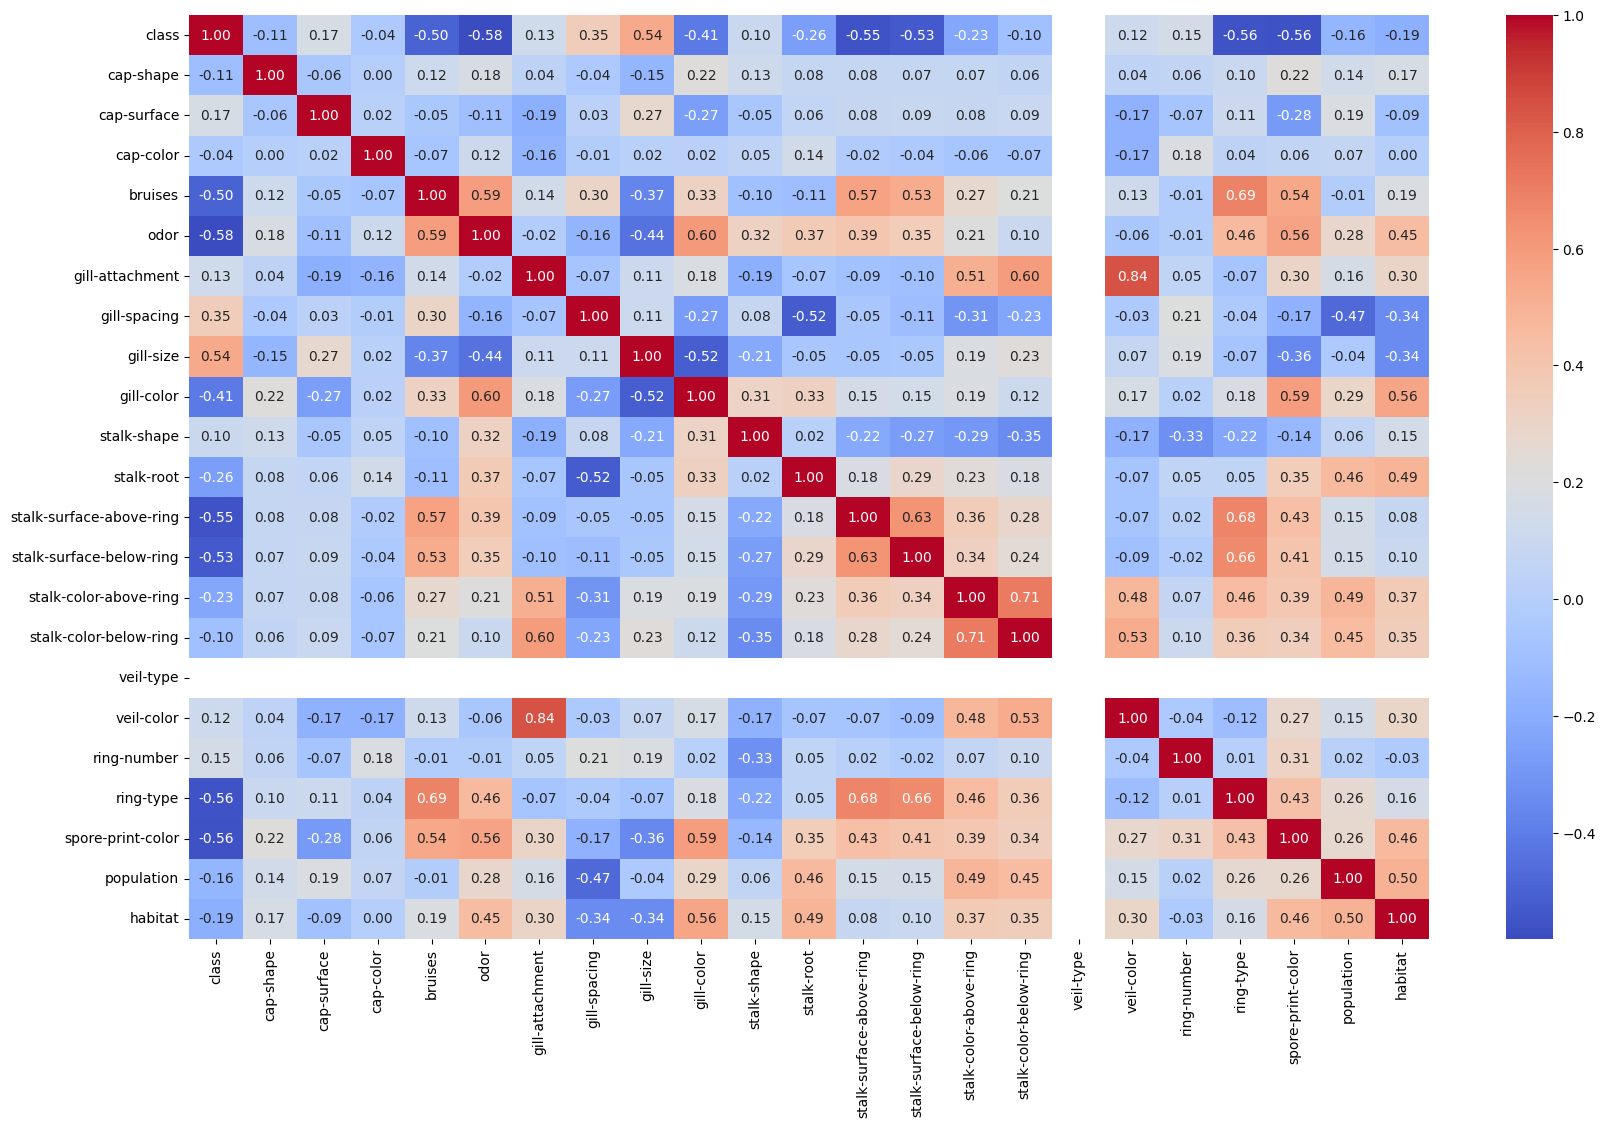

In [10]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Inference:

The columns 'cap-shape','cap-surface','cap-color','gill-attachment','stalk-shape','stalk-color-below-ring','veil-color','ring-number','population' and 'habitat' has very less correlation with the target variable 'class'

Creating a pairplot

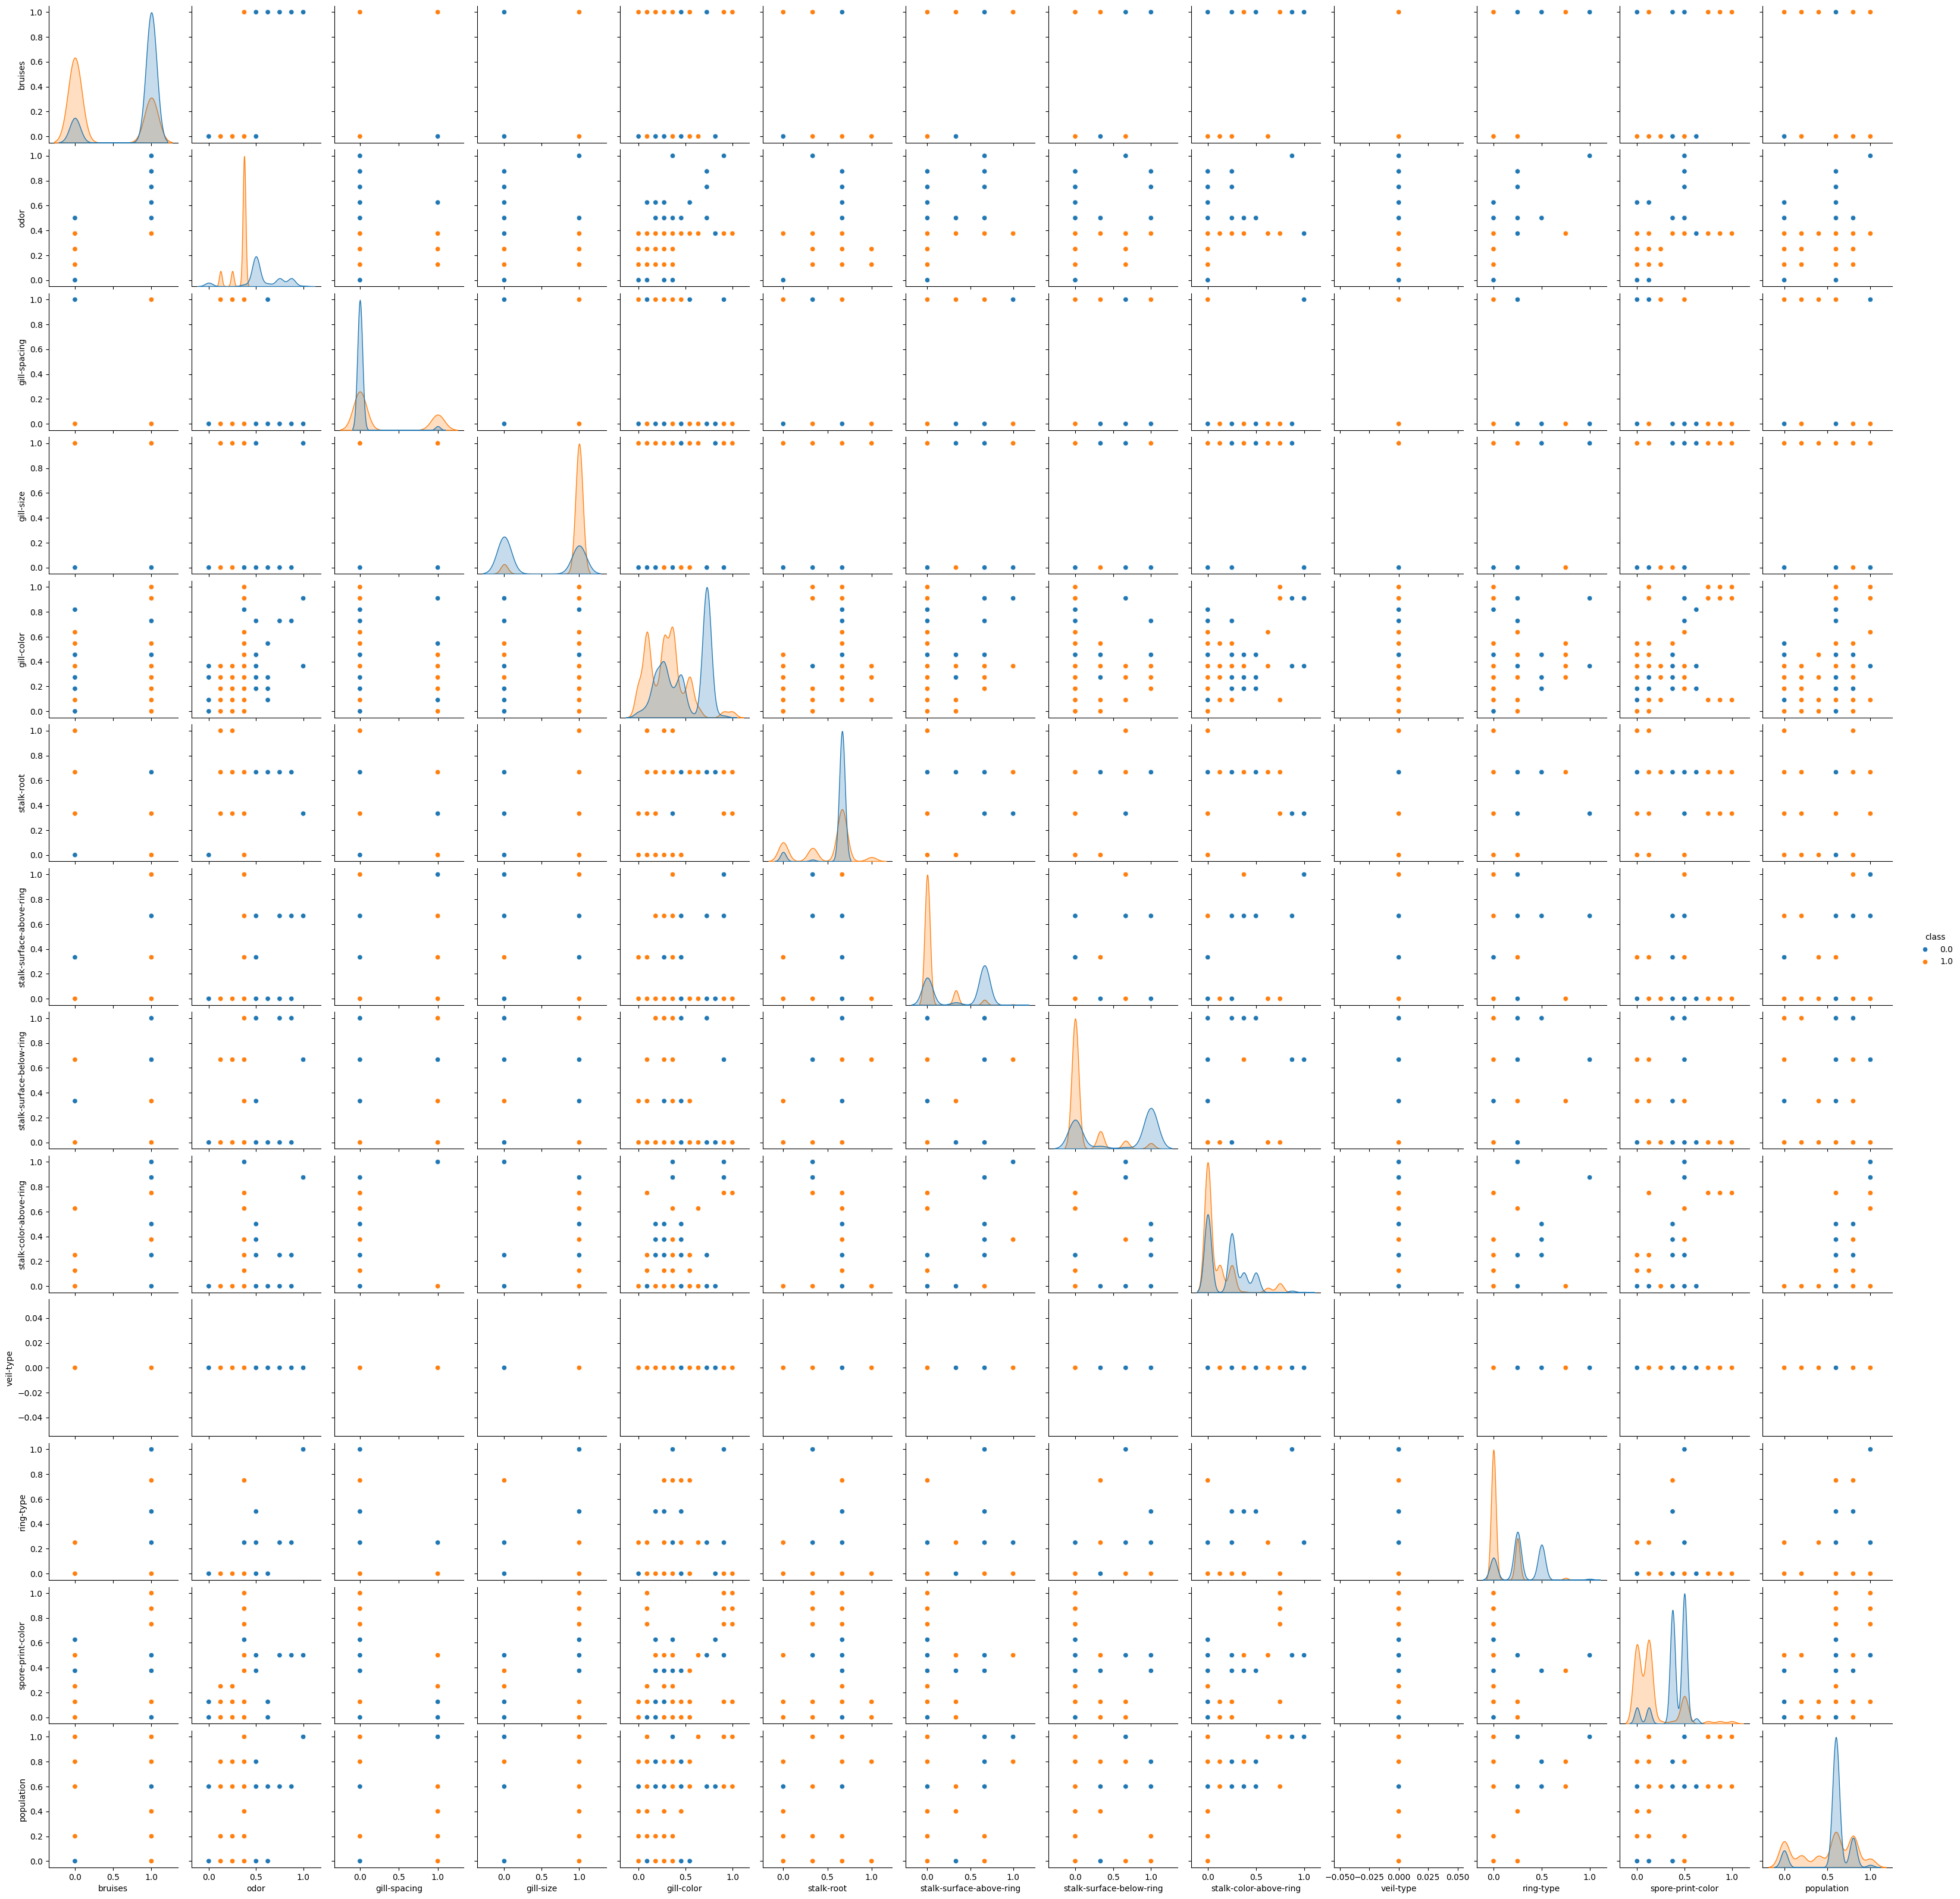

In [11]:
selected_df=df.drop(['cap-shape','cap-color','stalk-shape','gill-attachment'
,'cap-surface','stalk-color-below-ring','veil-color','habitat','ring-number'], axis=1)
sns.pairplot(selected_df,hue='class', diag_kind='kde')

Inference:

1.When the gill-spacing is more,the population of edible mushrooms are more.

2.As the gill-size increases,the population of edible mushrooms are also high.

3.When the odor is almond,alise and none,the mushrooms are more edible

Creating input feature and target variable arrays for the classification

In [12]:
y = df['class']
X = df.drop(['class','cap-shape','cap-color','stalk-shape','gill-attachment'
,'cap-surface','stalk-color-below-ring','veil-color','habitat','ring-number'], axis=1)
X,y

(      bruises   odor  gill-spacing  gill-size  gill-color  stalk-root  \
 0         0.0  0.000           0.0        0.0    0.000000    0.000000   
 1         0.0  0.125           0.0        1.0    0.000000    0.333333   
 2         0.0  0.250           0.0        1.0    0.090909    0.333333   
 3         0.0  0.000           0.0        0.0    0.090909    0.000000   
 4         1.0  0.375           1.0        1.0    0.000000    0.000000   
 ...       ...    ...           ...        ...         ...         ...   
 8119      1.0  0.375           0.0        1.0    0.909091    0.333333   
 8120      1.0  0.375           0.0        1.0    0.909091    0.666667   
 8121      1.0  0.375           0.0        1.0    0.090909    0.333333   
 8122      1.0  0.750           0.0        0.0    0.727273    0.666667   
 8123      1.0  0.375           0.0        1.0    0.909091    0.333333   
 
       stalk-surface-above-ring  stalk-surface-below-ring  \
 0                          0.0                  

Splitting the target and feature variables as test and train sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Implementing sklearn's Support Vector Machine Classification model

In [14]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',C=1)
svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc_model.predict(X_test)

Printing the accuracy, confusion matrix,and classification report for the sklearn's Support Vector Machine classification model's predictions

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 97.09%
Confusion Matrix:
[[1169   12]
 [  59 1198]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1181
         1.0       0.99      0.95      0.97      1257

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



Creating a custom Support Vector Machine classification class with a linear kernel using the hinge loss function

In [16]:
class Support_Vector_Classification:
    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    def __str__(self):
        return f"Support_Vector_Classification"

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def cfit(self, X, Y, batch_size=128, learning_rate=0.01, epochs=100):
        X=X.to_numpy()
        Y=Y.to_numpy()
        Y[Y == 0] = -1
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses
            losses.append(l)

            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients
                            #w.r.t w
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w = w
        self.b = b

        return self.w, self.b, losses

    def cpredict(self, X):
        X=X.to_numpy()
        prediction = np.dot(X, self.w[0]) + self.b
        prediction=np.sign(prediction)
        prediction[prediction==-1]=0
        return prediction

Splitting the target and feature variables as test and train sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creating an instance of the Support_Vector_Classification class and assigning it to a variable 'custom_svm_model'

In [18]:
custom_svm_model = Support_Vector_Classification()

custom_svm_model.cfit(X_train, y_train)
custom_y_pred = custom_svm_model.cpredict(X_test)

Printing the accuracy,confusion matrix,confusion matrix heatmap, and classification report for the custom Support Vector Machine classification model


Accuracy: 93.31%
Confusion Matrix:


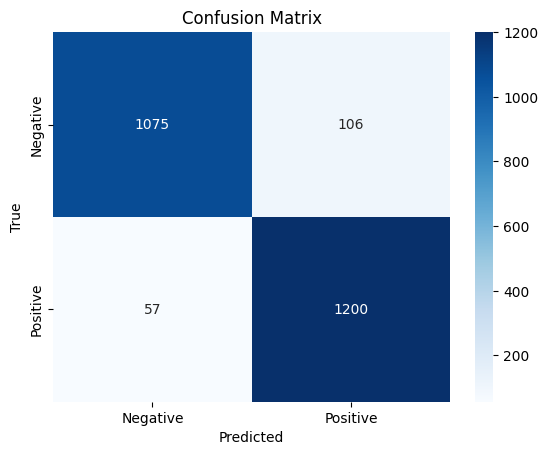

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      1181
         1.0       0.92      0.95      0.94      1257

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [19]:
accuracy = accuracy_score(y_test,custom_y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
cm=confusion_matrix(y_test,custom_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test,custom_y_pred))

Inference:

There are,

1.1062 true negative values

2.119 false positive values

3.55 false negative values

4.1202 true positive values

 in the prediction

Plotting ROC curves for both the custom and sklearn models,and displaying the area under the ROC curve

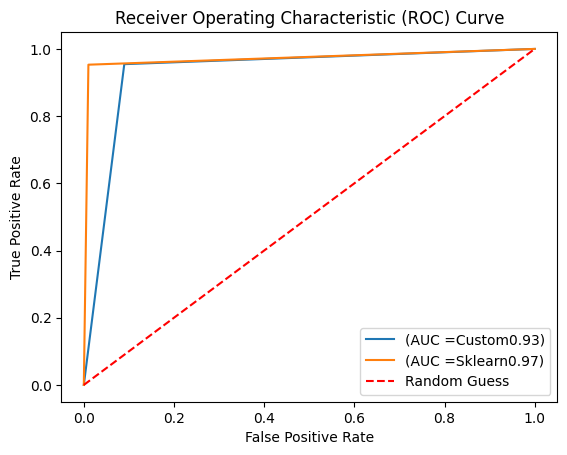

In [20]:
# AUC-ROC Curve
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc

models={'Custom':custom_y_pred,'Sklearn':y_pred}
for model_name, model_prob in models.items():
  fpr, tpr, thresholds = roc_curve(y_test,model_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'(AUC ={model_name}{roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Since the ROC curve is a triangle,it indicates the model is a perfect model